In [3]:
import tensorflow as tf
from tensorflow import keras


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
#loading the handwritten digits datasets from keras
(x_train,y_train), (x_test,y_test) = keras.datasets.mnist.load_data()


In [6]:
#each sample is a 28*28 image
x_train[0].shape

(28, 28)

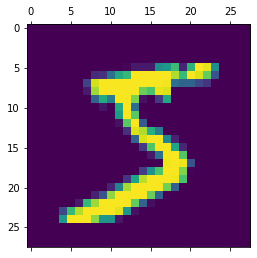

In [11]:
#how does it really look?
plt.matshow(x_train[0])

In [8]:
#how does the training data of y looks?
y_train[0]

5

We scale training and test data

In [16]:
x_test=x_test/255
x_train=x_train/255

We have to convert 28*28 2-D array to a 1_D array (flattening)

In [17]:
x_trained_flattened=x_train.reshape(len(x_train),28*28)
x_trained_flattened.shape

(60000, 784)

In [18]:
x_test_flattened=x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

So we have a stack of layers. We have 784 input layers and 10 output layers. every input lataer is connected with each output neuron. Here we use Sigmoid actvation function 

First, Define the Neural network. Then compile and fit the model

In [23]:
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')]) 
#dense means every input lataer is connected with each output neuron.

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_trained_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 698us/step - loss: 0.7182 - accuracy: 0.8134
Epoch 2/10
1875/1875 [==============================] - 1s 679us/step - loss: 0.3104 - accuracy: 0.9135
Epoch 3/10
1875/1875 [==============================] - 1s 715us/step - loss: 0.2880 - accuracy: 0.9197
Epoch 4/10
1875/1875 [==============================] - 1s 728us/step - loss: 0.2718 - accuracy: 0.9240
Epoch 5/10
1875/1875 [==============================] - 1s 704us/step - loss: 0.2640 - accuracy: 0.92730s - loss: 0.2640 - accuracy: 0.92
Epoch 6/10
1875/1875 [==============================] - 1s 700us/step - loss: 0.2659 - accuracy: 0.9255
Epoch 7/10
1875/1875 [==============================] - 1s 684us/step - loss: 0.2553 - accuracy: 0.9275
Epoch 8/10
1875/1875 [==============================] - 1s 686us/step - loss: 0.2479 - accuracy: 0.9314
Epoch 9/10
1875/1875 [==============================] - 1s 673us/step - loss: 0.2499 - accuracy: 0.9307
Epoch 10/10
1875/1875 [=======

Now the model is evaluated against test data

In [24]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 474us/step - loss: 0.2644 - accuracy: 0.9263


[0.2644011080265045, 0.9262999892234802]

This has a good accuracy of 92%. Prediction

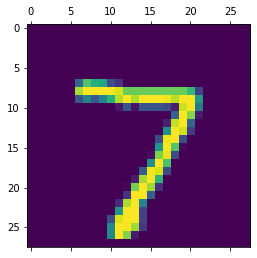

In [25]:
plt.matshow(x_test[0])

In [27]:
y_predicted=model.predict(x_test_flattened)
y_predicted[0]

This produce the probability of each output neuron. Print the index of max

In [29]:
np.argmax(y_predicted[0])

7

Confusion Matrix


In [36]:
y_predicted_labels=[np.argmax(i) for i in y_predicted] #convert the array in each y_predicted to the corresponding digit
conf_mat=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Observing an heat map to better visualize


Text(69.0, 0.5, 'observed')

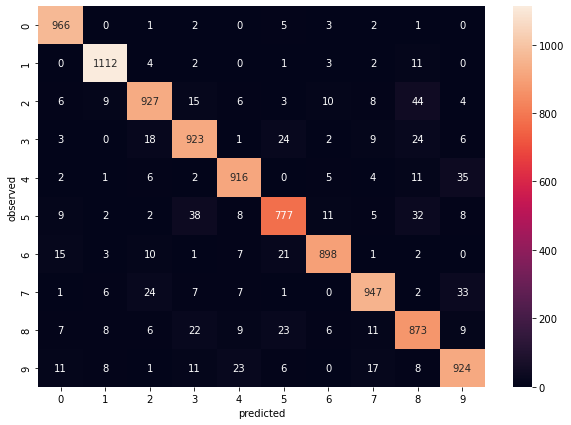

In [37]:
import seaborn as sn
plt.figure(figsize= (10,7))
sn.heatmap(conf_mat,annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('observed')


In the above dagram the numbers in the off diagonal vslues imply misclssifications. For an example, there were 44 instances when number 2 was misclassified as number 8.


Adding a hidden layer

In [39]:
model=keras.Sequential([keras.layers.Dense(100,input_shape=(784,),activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid')]) 
#dense means every input lataer is connected with each output neuron.

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_trained_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 757us/step - loss: 0.4568 - accuracy: 0.8699
Epoch 2/10
1875/1875 [==============================] - 2s 828us/step - loss: 0.1379 - accuracy: 0.9595
Epoch 3/10
1875/1875 [==============================] - 1s 740us/step - loss: 0.0857 - accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 1s 738us/step - loss: 0.0651 - accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 1s 737us/step - loss: 0.0510 - accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 1s 743us/step - loss: 0.0401 - accuracy: 0.9877
Epoch 7/10
1875/1875 [==============================] - 1s 726us/step - loss: 0.0308 - accuracy: 0.9910
Epoch 8/10
1875/1875 [==============================] - 1s 730us/step - loss: 0.0273 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 1s 740us/step - loss: 0.0220 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 1s 727u

In [40]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 494us/step - loss: 0.0850 - accuracy: 0.9752


[0.08501054346561432, 0.9751999974250793]

Now the accuracy improved to 98 %. 

Text(69.0, 0.5, 'observed')

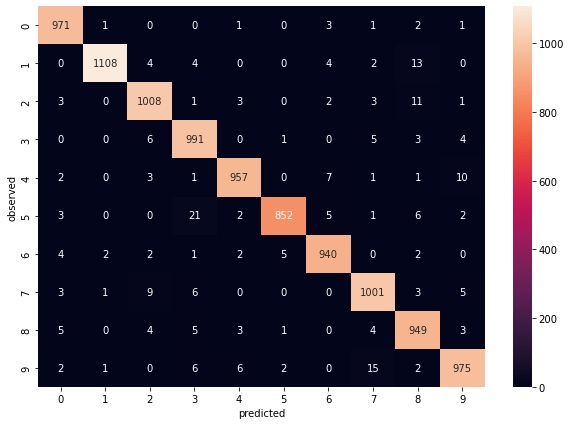

In [41]:
y_predicted=model.predict(x_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted] #convert the array in each y_predicted to the corresponding digit
conf_mat=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize= (10,7))
sn.heatmap(conf_mat,annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('observed')

The folowing code allows to put X-train and test data to the model without flattening


In [44]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(100,activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid')]) 
#dense means every input lataer is connected with each output neuron.

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 771us/step - loss: 0.4554 - accuracy: 0.8703
Epoch 2/10
1875/1875 [==============================] - 2s 814us/step - loss: 0.1310 - accuracy: 0.9615
Epoch 3/10
1875/1875 [==============================] - 1s 743us/step - loss: 0.0883 - accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 1s 754us/step - loss: 0.0644 - accuracy: 0.9808
Epoch 5/10
1875/1875 [==============================] - 1s 752us/step - loss: 0.0525 - accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 1s 733us/step - loss: 0.0390 - accuracy: 0.9882
Epoch 7/10
1875/1875 [==============================] - 1s 745us/step - loss: 0.0302 - accuracy: 0.9914
Epoch 8/10
1875/1875 [==============================] - 1s 730us/step - loss: 0.0277 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 1s 758us/step - loss: 0.0197 - accuracy: 0.9945
Epoch 10/10
1875/1875 [==============================] - 1s 748u